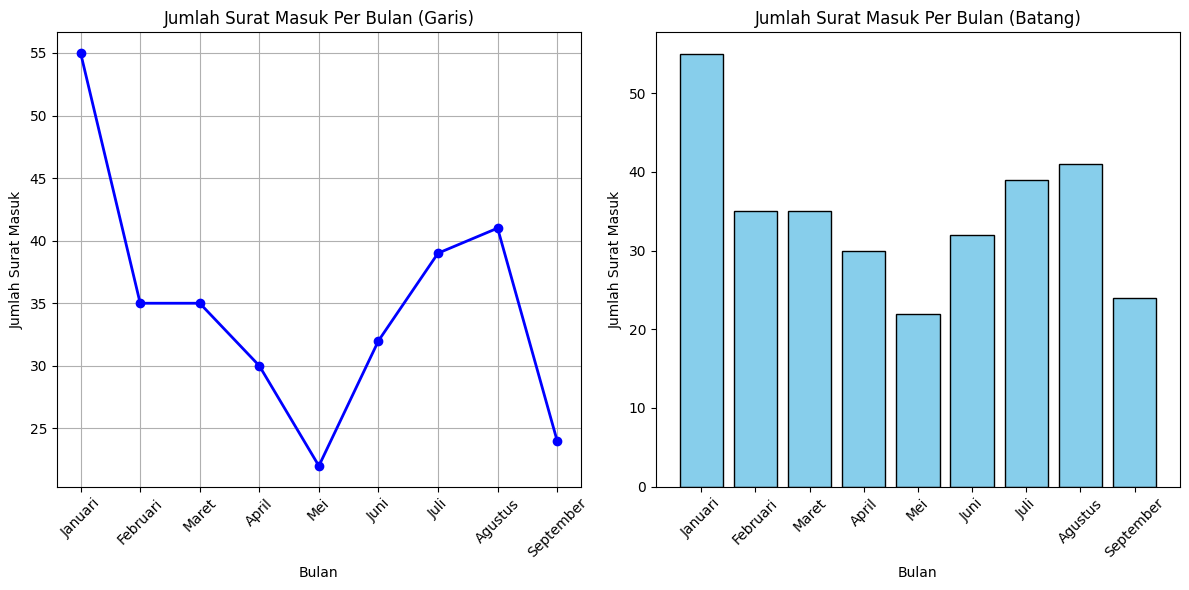

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Gabungan_Data.xlsx'
df = pd.read_excel(file_path)

# Mengubah kolom 'TANGGAL' menjadi tipe datetime agar bisa diolah per bulan
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], errors='coerce', dayfirst=True)

# Menghapus baris yang memiliki nilai tanggal kosong
df = df.dropna(subset=['TANGGAL'])

# Mengelompokkan data berdasarkan bulan dan menghitung jumlah surat per bulan
df['Bulan'] = df['TANGGAL'].dt.month  # Mengelompokkan data berdasarkan bulan
monthly_data = df[df['Bulan'] <= 9].groupby('Bulan').size().reset_index(name='Jumlah_Surat')

# Mengonversi angka bulan menjadi nama bulan
bulan_dict = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 
              6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September'}
monthly_data['Bulan'] = monthly_data['Bulan'].map(bulan_dict)

# Membuat visualisasi
plt.figure(figsize=(12, 6))

# Subplot untuk Grafik Garis
plt.subplot(1, 2, 1)
plt.plot(monthly_data['Bulan'], monthly_data['Jumlah_Surat'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Jumlah Surat Masuk Per Bulan (Garis)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Surat Masuk')
plt.grid(True)
plt.xticks(rotation=45)

# Subplot untuk Diagram Batang
plt.subplot(1, 2, 2)
plt.bar(monthly_data['Bulan'], monthly_data['Jumlah_Surat'], color='skyblue', edgecolor='black')
plt.title('Jumlah Surat Masuk Per Bulan (Batang)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Surat Masuk')
plt.xticks(rotation=45)

# Mengatur layout agar tidak terpotong
plt.tight_layout()
plt.show()
